In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df = df.iloc[:, 1:]
print(df.isnull().any())
df.info()
df.columns
#df.drop("id",axis=1,inplace=True)
df

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory us

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.duplicated().sum()

24

In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [5]:
df['age']=(df['age']/365).apply(np.floor)
df['age'] = df.age.astype(int)

In [6]:
ap = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) 
# create bound for each ap
index = 0
while index < len(ap):
    each = ap[index]
    Q1 = df[each].quantile(0.25)
    Q3 = df[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
    index += 1
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [7]:
ap_hi_filter = (df["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (df["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = df[outlier_filter]
x_outliers["cardio"].value_counts()

1    2025
0     388
Name: cardio, dtype: int64

In [8]:
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200) )
print("There is {} outlier".format(df[out_filter]["cardio"].count()))

There is 993 outlier


In [9]:
df = df[~out_filter]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68983 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68983 non-null  int64  
 1   gender       68983 non-null  int64  
 2   height       68983 non-null  int64  
 3   weight       68983 non-null  float64
 4   ap_hi        68983 non-null  int64  
 5   ap_lo        68983 non-null  int64  
 6   cholesterol  68983 non-null  int64  
 7   gluc         68983 non-null  int64  
 8   smoke        68983 non-null  int64  
 9   alco         68983 non-null  int64  
 10  active       68983 non-null  int64  
 11  cardio       68983 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


Text(0, 0.5, '')

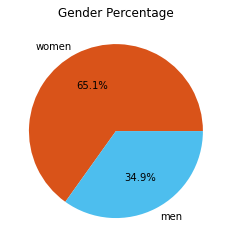

In [11]:
temp = df.groupby('gender').size().rename(index={1:'women',2:'men'})
temp.plot(kind='pie',autopct='%.1f%%',colors=['#D95319','#4DBEEE'],title='Gender Percentage').set_ylabel('')
# plt.savefig('gender_percentage.jpg')

Text(0, 0.5, '')

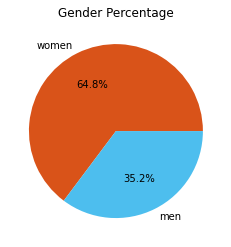

In [12]:
temp1 = df[df['cardio']==1].groupby('gender').size().rename(index={1:'women',2:'men'})
temp1.plot(kind='pie',autopct='%.1f%%',colors=['#D95319','#4DBEEE'],title='Gender Percentage').set_ylabel('')

In [13]:
print("max value: \n", df[['age','height','weight','ap_hi','ap_lo']].max())
print("min value: \n", df[['age','height','weight','ap_hi','ap_lo']].min())
print("average value: \n", df[['age','height','weight','ap_hi','ap_lo']].mean())

max value: 
 age        64.0
height    250.0
weight    200.0
ap_hi     240.0
ap_lo     190.0
dtype: float64
min value: 
 age        29.0
height     55.0
weight     11.0
ap_hi    -150.0
ap_lo     -70.0
dtype: float64
average value: 
 age        52.826899
height    164.359523
weight     74.120617
ap_hi     126.298160
ap_lo      81.332111
dtype: float64


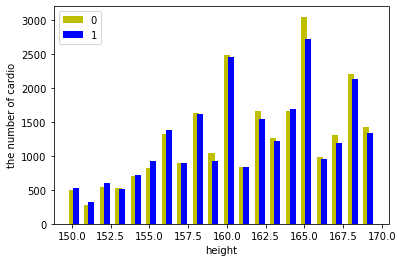

In [14]:

# temp = pd.cut(df['height'],bins=[30, 120, 130, 140, 150, 160,170],
#                      right=False, labels=['30-120', '120-130', '130-140', '140-150', '150-160', 'above 160'])
# print('wide_count:')
# print(pd.value_counts(temp))
# df[df['height']>=150].groupby('height').plot(kind="bar",x='height')
tempdf = df[['height', 'cardio']]
df1 = pd.DataFrame(data=None)
list1 = list()
list2 = list()
height = list()
height2 = list()
for i in range(150, 170):
    temp = tempdf[tempdf['height']==i].groupby('cardio').size()
    height.append(i)
    height2.append(i+0.25)
    list1.append(temp[0])
    list2.append(temp[1])

plt.bar(height, list1, color='y', width = 0.4,label='0')
plt.bar(height2, list2, color='b', width = 0.4,label='1')
plt.legend(loc='upper left')
plt.xlabel('height')
plt.ylabel('the number of cardio')
plt.savefig('height&cardio.jpg')
plt.show()

In [15]:
# temp = pd.cut(df['age'],bins=[10000,18000, 20000, 22000, 24000],
#                      right=False, labels=['a', 'b', 'c', 'd',])
# print('wide_count:')
# print(pd.value_counts(temp))

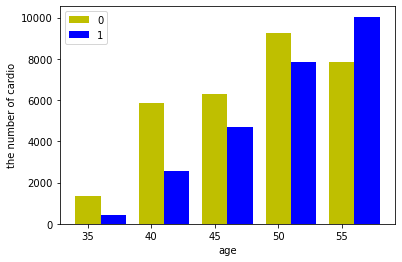

In [16]:
tempdf = df[['age', 'cardio']]
df1 = pd.DataFrame(data=None)
list1 = list()
list2 = list()
height = list()
height2 = list()
bas = [35, 40, 45, 50, 55, 60, 65]
for i in range(5):
    temp = tempdf[((tempdf['age']>=bas[i]) & (tempdf['age']<bas[i+1]))].groupby('cardio').size()
#     print(temp)
    height.append(bas[i])
    height2.append(bas[i+1]-3)
    list1.append(temp[0])
    list2.append(temp[1])

plt.bar(height, list1, color='y', width = 2,label='0')
plt.bar(height2, list2, color='b', width = 2,label='1')
plt.legend(loc='upper left')
plt.xlabel('age')
plt.ylabel('the number of cardio')
plt.savefig('age&cardio.jpg')
plt.show()

['/Users/kaijingzhang/Desktop', '/opt/anaconda3/lib/python38.zip', '/opt/anaconda3/lib/python3.8', '/opt/anaconda3/lib/python3.8/lib-dynload', '', '/opt/anaconda3/lib/python3.8/site-packages', '/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/kaijingzhang/.ipython']


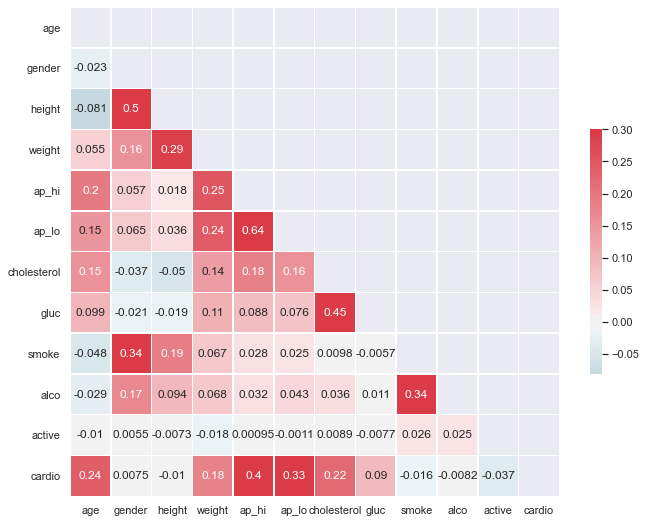

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.path)
sys.path.append('<path to package in your syste>')
import seaborn as sns
sns.set()
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
df["bmi"] = df["weight"]/ (df["height"]/100)**2
df

<ipython-input-18-e33836ed72a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bmi"] = df["weight"]/ (df["height"]/100)**2


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [19]:
print(df.corr()['cardio'].sort_values(ascending=False))
df.corr().iloc[-1:]

cardio         1.000000
ap_hi          0.397351
ap_lo          0.328110
age            0.239566
cholesterol    0.221358
weight         0.179876
bmi            0.163495
gluc           0.089727
gender         0.007456
alco          -0.008151
height        -0.010400
smoke         -0.016371
active        -0.037275
Name: cardio, dtype: float64


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
bmi,0.086221,-0.096047,-0.292318,0.759507,0.215254,0.199757,0.144954,0.100995,-0.028195,0.014817,-0.014743,0.163495,1.0


<function matplotlib.pyplot.show(*args, **kw)>

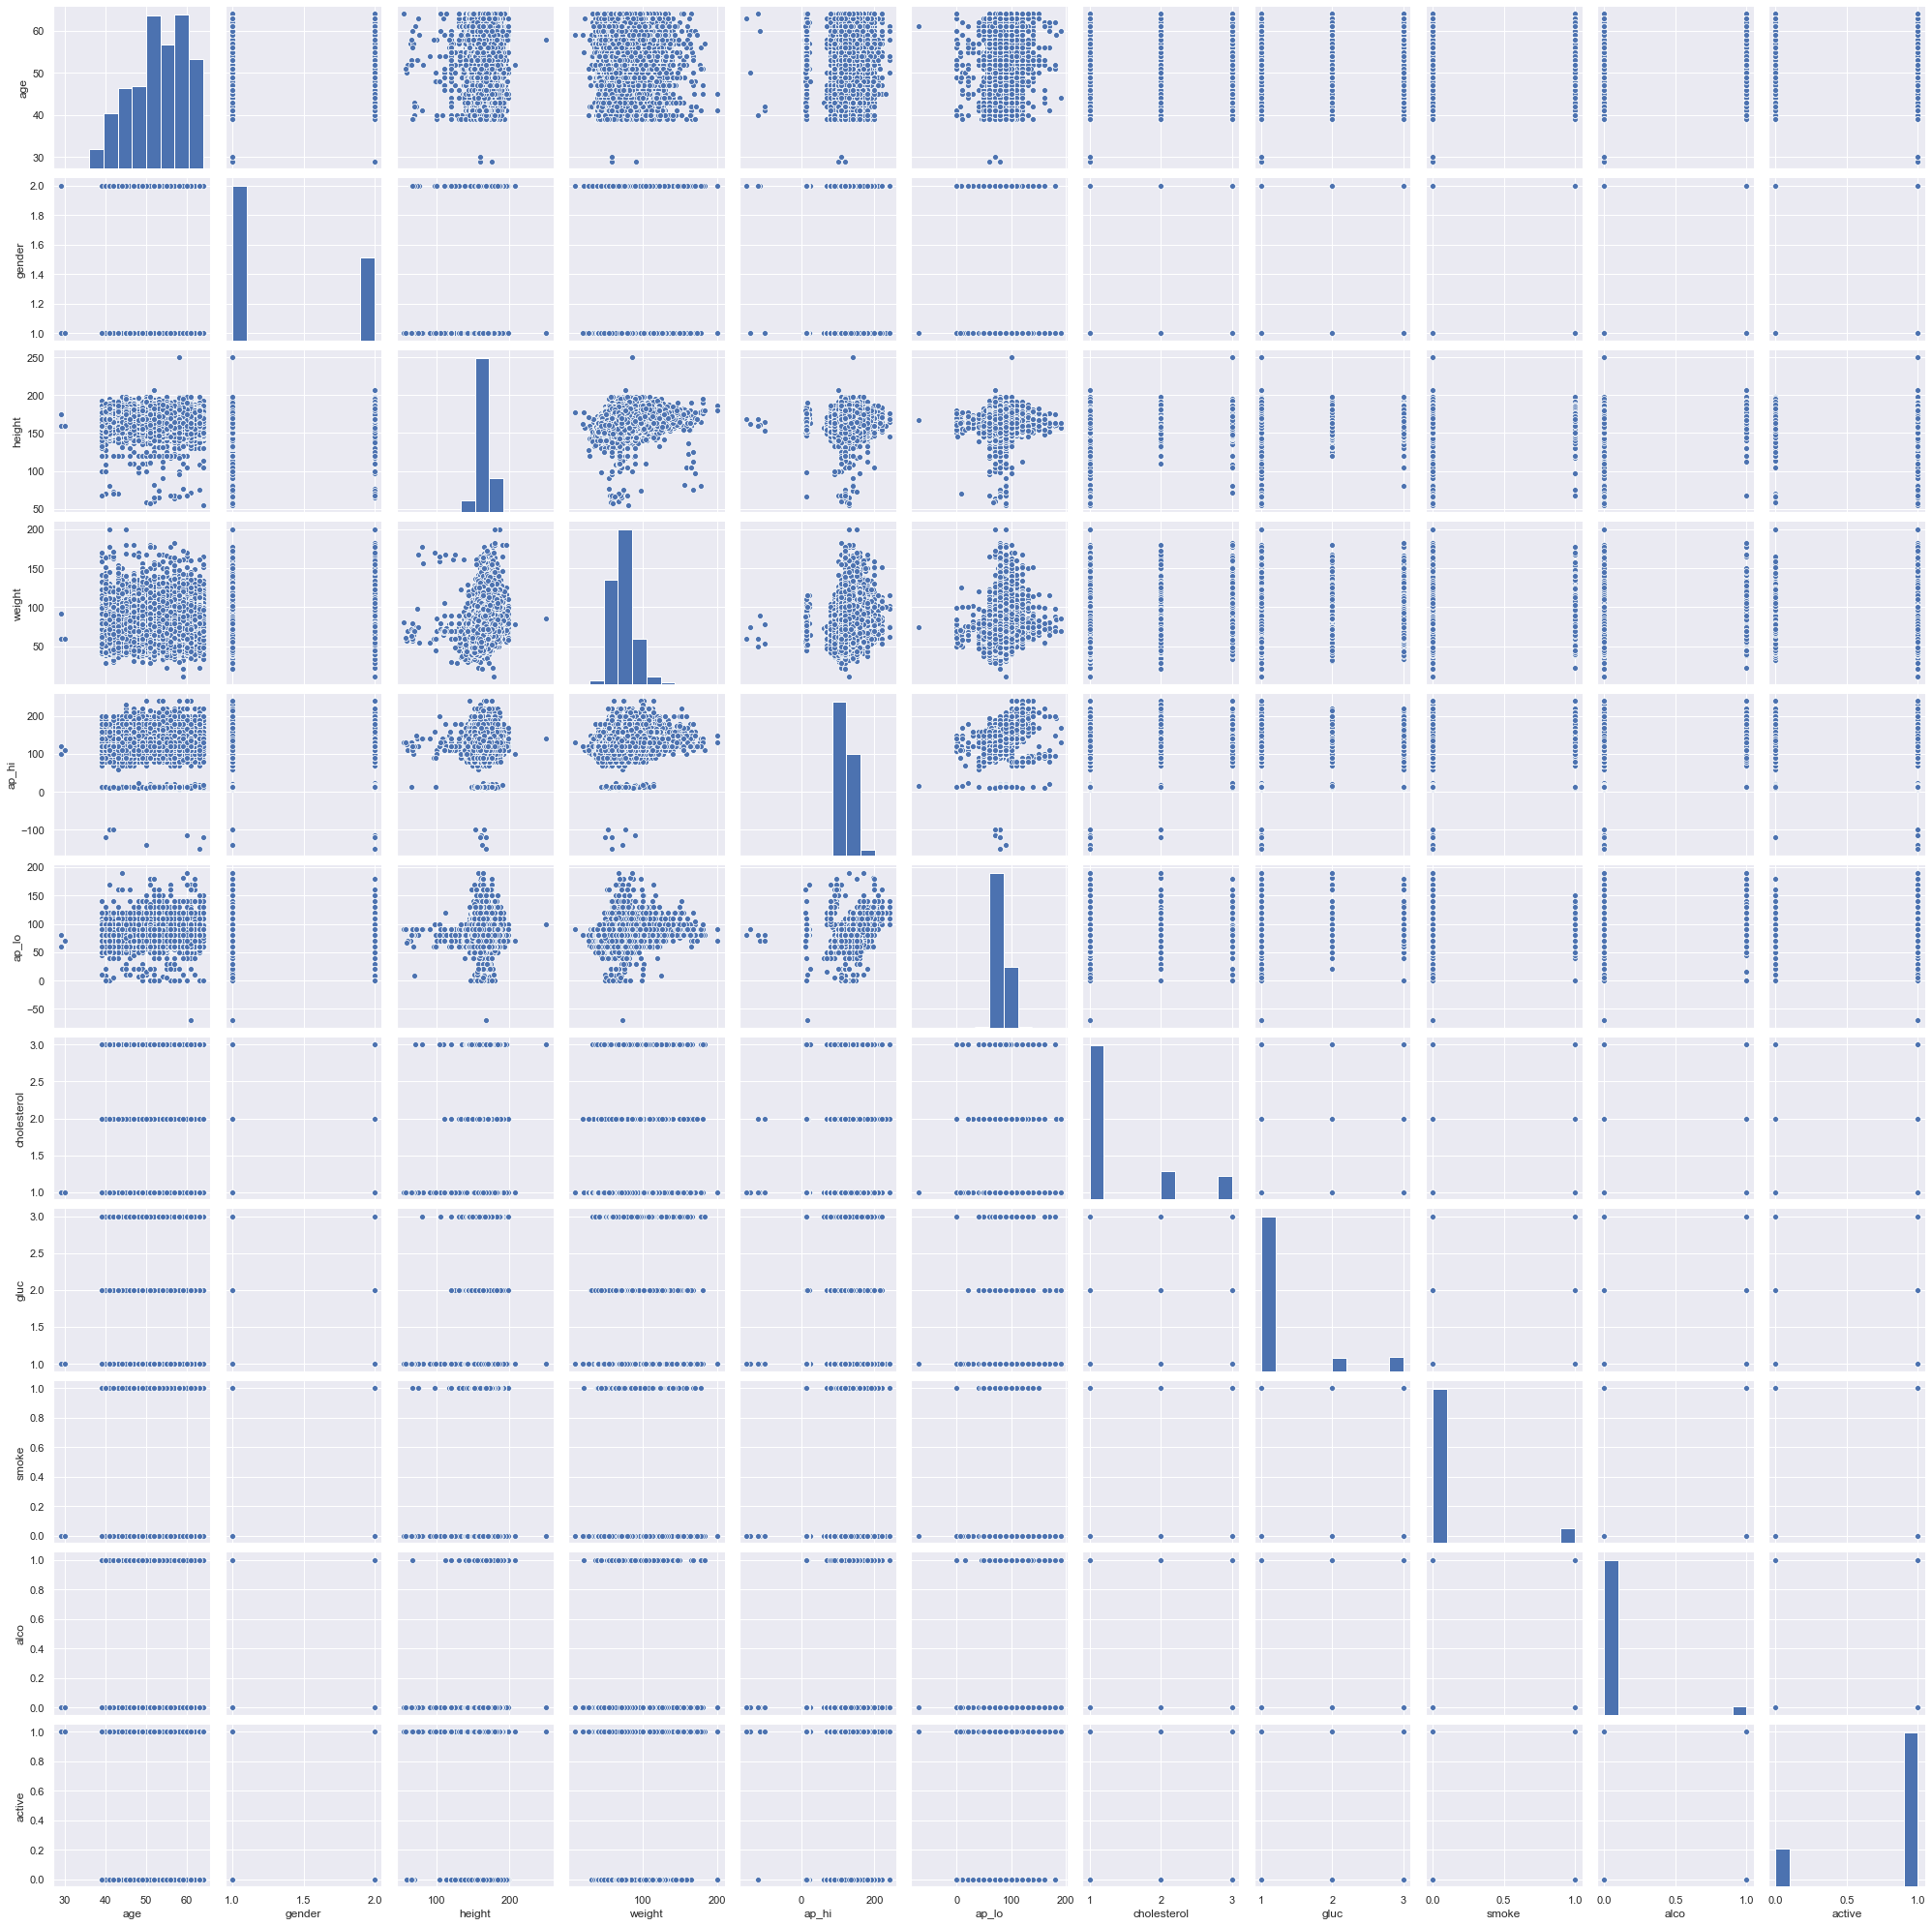

In [20]:
cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active']

sns.pairplot(df[cols], height = 2.5)

plt.show

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # Import train_test_split function

X=df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y=df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

X_importance=clf.feature_importances_
print(X_importance)

y_pred=clf.predict(X_test)
# print(len(y_pred))
# print(len(y_test.values.tolist()))
print(accuracy_score(y_test, clf.predict(X_test)))


[0.16784626 0.01927994 0.21007297 0.23472651 0.176383   0.09726955
 0.04007039 0.02010451 0.01005262 0.00838927 0.01580498]
0.7106547475235564


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X=df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y=df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6417008939357333


In [24]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
naive = GaussianNB()
svm = SVC(random_state=1)

models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "Naive bayes" :naive,
          "SVM" : svm}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)
    
scores_df= pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_df.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_df

,Accuracy Score
SVM,0.726262
Random forest,0.710123
Naive bayes,0.707466
Decision tree,0.639913


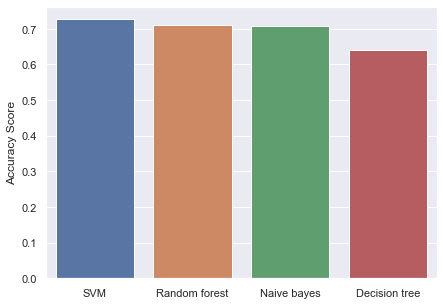

In [25]:
plt.figure(figsize=(7,5))
sns.barplot(x=scores_df.index,y=scores_df["Accuracy Score"])

In [26]:
from sklearn.model_selection import cross_val_score
accuracy_svm = cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10)

In [27]:
# for testing k fold
print(accuracy_svm.mean())
print(accuracy_svm.std())

0.719744113640953
0.006626675055115804


In [28]:
#testing data sccuracy
predicted_svc=svm.predict(X_test)
accuracy = accuracy_score(y_test, predicted_svc)
print(accuracy)

0.726262382217927


In [29]:
#confusion matrix
conf_mat = confusion_matrix(y_test, predicted_svc)
print(conf_mat)

[[8590 1850]
 [3815 6440]]


In [30]:
# get values for confusion matrix
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [31]:
# get values compute by confusion matrix
# Precison
Precision = true_positive/(true_positive+false_positive)
print(Precision)

# Recall
Recall= true_positive/(true_positive+false_negative)
print(Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print(F1_Score)

0.8227969348659003
0.6924627166465135
0.7520245130225434


In [32]:
#get accuracy for training data set
predicted_svc=svm.predict(X_train)
accuracy_t = accuracy_score(y_train, predicted_svc)
print(accuracy_t)

0.7206966534128562


In [33]:
conf_mat_train = confusion_matrix(y_train, predicted_svc)
print(conf_mat)

[[8590 1850]
 [3815 6440]]


In [34]:
# for training 
true_positive_t = conf_mat_train[0][0]
false_positive_t = conf_mat_train[0][1]
false_negative_t = conf_mat_train[1][0]
true_negative_t = conf_mat_train[1][1]

In [35]:
# Precison
Precision_t = true_positive_t/(true_positive_t+false_positive_t)
print(Precision_t)
# Recall
Recall_t= true_positive_t/(true_positive_t+false_negative_t)
print(Recall_t)
# F1 Score
F1_Score_t = 2*(Recall_t * Precision_t) / (Recall_t + Precision_t)
print(F1_Score_t)

0.8134426229508197
0.6895737067018727
0.7464039260666003


In [36]:
#get data frame
svm_dict = {'Precision':[Precision], 'Recall':[Recall],'F1_Score':[F1_Score]}
df_svm = pd.DataFrame.from_dict(svm_dict)
df_svm

,Precision,Recall,F1_Score
0,0.822797,0.692463,0.752025


In [37]:
svm_dict_t = {'Precision_t':[Precision_t], 'Recall_t':[Recall_t],'F1_Score_t':[F1_Score_t]}
df_svm_t = pd.DataFrame.from_dict(svm_dict_t)
df_svm_t

,Precision_t,Recall_t,F1_Score_t
0,0.813443,0.689574,0.746404


In [38]:
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier

In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7283884996375937


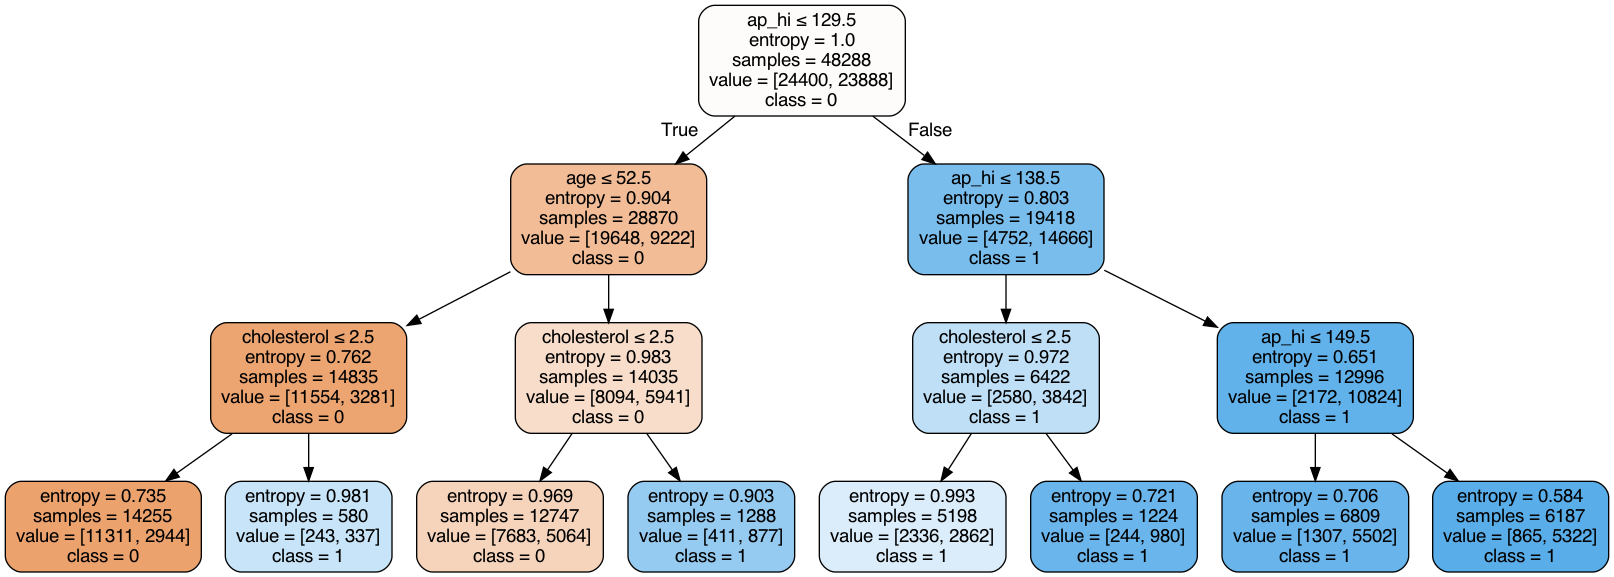

In [40]:
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
Image(graph.create_png())